<a href="https://www.kaggle.com/code/kamalapousajja/house-price-prediction-ml-course-kaggle-learn?scriptVersionId=154992054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This notebook has a reference from the Intermediate Machine Learning course at Kaggle learn. 

The data from the Housing Prices Competition for Kaggle Learn Users to predict home prices in Iowa using 79 explanatory variables describing (almost) every aspect of the homes.

The contents of this notebook:
* Lesson 1 - MAE
* Lesson 2 - Missing Values
* Lesson 3 - Categorial Variables
* Lesson 4 - Pipelines
* Lesson 5 - Cross-Validation
* Lesson 6 - XG-Boost

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Lesson 1 - MAE

In [2]:
# Read the data

X_full = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')

X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')


In [3]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
# Obtain target and predictors

y = X_full.SalePrice

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

In [6]:
# Break off validation set from training data

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [7]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


In [8]:
# Defines five different random forest models

from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function score_model() below. 

This function returns the mean absolute error (MAE) from the validation set. 

Recall that the best model will obtain the lowest MAE. 

In [9]:
# Function for comparing different models

from sklearn.metrics import mean_absolute_error

def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


Evaluate the models.

Which model is the best model?

Which model gets the lowest MAE score?

Answer: Model 3

In [10]:
# Prediction

# Define a model
best_model = model_3
my_model = best_model

# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

In [11]:
# Save predictions in format used for competition scoring

output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Lesson 2 - Missing Values 

You will learn three approaches to dealing with missing values. 

Then you'll compare the effectiveness of these approaches on a real-world dataset.

**Three approaches**

* 1) A Simple Option: **Drop Columns with Missing Values**
* 2) A Better Option: **Imputation**

Imputation fills in the missing values with some number. 
For instance, we can fill in the mean value along each column.
The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

* 3) **An Extension To Imputation**

In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.
In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

# 2.1 - Drop Columns with Missing Values

This is the most straightforward approach. 

All the columns that have missing values will be drop.



In [12]:
# Read the data

X_full = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors

X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors

X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [13]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


You can already see a few missing values in the first several rows. In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.



In [14]:
# Preliminary investigation

# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data

missing_val_count_by_column = (X_train.isnull().sum())

print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


How many rows are in the training data?

num_rows = 1168

How many columns in the training data have missing values?

num_cols_with_missing = 3

How many missing entries are contained in all of the training data?

tot_missing = 212 + 6 + 58

In [15]:
# To compare different approaches to dealing with missing values, you'll use the same score_dataset() function from the tutorial. 
# This function reports the mean absolute error (MAE) from a random forest model.

# Create Function for comparing different approaches

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [16]:
# Get names of columns with missing values

cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

cols_with_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
# Drop columns with missing values in training and validation data

reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

In [18]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


In [19]:
# Store the score in the dictionary

scores_dict = {} 

scores_dict['2.1_Drop columns with missing values'] = score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid) 

print(scores_dict['2.1_Drop columns with missing values'])

17837.82570776256


# 2.2 - Imputation(strategy='mean')

Impute missing values with the mean value along each column. 

In [20]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()  

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [21]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


In [22]:
# Store the score in the dictionary

scores_dict['2.2_Imputation_mean'] = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)

print(scores_dict['2.2_Imputation_mean'])

18062.894611872147


Compare the MAE from each approach. 

Does anything surprise you about the results? 

Why do you think one approach performed better than the other?


Given that there are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! 

While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. 

For instance, consider the GarageYrBlt column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

# 2.3 - Imputation(strategy='median')

You can use any approach of your choosing here! 

in order for this step to be marked as correct, you need only ensure:

* the preprocessed DataFrames have the same number of columns,
* the preprocessed DataFrames have no missing values,
* final_X_train and y_train have the same number of rows, and
* final_X_valid and y_valid have the same number of rows.

In [23]:
# Preprocessed training and validation features

# Imputation

median_imputer = SimpleImputer(strategy='median')
median_X_train = pd.DataFrame(median_imputer.fit_transform(X_train))
median_X_valid = pd.DataFrame(median_imputer.transform(X_valid))

# Imputation removed column names; put them back
median_X_train.columns = X_train.columns
median_X_valid.columns = X_valid.columns

In [24]:
print("MAE (Imputation(strategy='median')):")
print(score_dataset(median_X_train, median_X_valid, y_train, y_valid))

MAE (Imputation(strategy='median')):
17791.59899543379


In [25]:
# Store the score in the dictionary

scores_dict['2.3_Imputation_median'] = score_dataset(median_X_train, median_X_valid, y_train, y_valid)

print(scores_dict['2.3_Imputation_median'])

17791.59899543379


# 2.4 - Imputation(strategy='most_frequent')

In [26]:
# Preprocessed training and validation features

# Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_X_train = pd.DataFrame(mode_imputer.fit_transform(X_train))
mode_X_valid = pd.DataFrame(mode_imputer.transform(X_valid))

# Imputation removed column names; put them back
mode_X_train.columns = X_train.columns
mode_X_valid.columns = X_valid.columns

In [27]:
print("MAE (Imputation(strategy='most_frequent')):")
print(score_dataset(mode_X_train, mode_X_valid, y_train, y_valid))

MAE (Imputation(strategy='most_frequent')):
17956.065479452056


In [28]:
# Store the score in the dictionary

scores_dict['2.4_Imputation_mode'] = score_dataset(mode_X_train, mode_X_valid, y_train, y_valid)

print(scores_dict['2.4_Imputation_mode'])

17956.065479452056


# 2.5 - Imputation(strategy='constant')

In [29]:
# Preprocessed training and validation features

# Imputation
constant_imputer = SimpleImputer(strategy='constant')
constant_X_train = pd.DataFrame(constant_imputer.fit_transform(X_train))
constant_X_valid = pd.DataFrame(constant_imputer.transform(X_valid))

# Imputation removed column names; put them back
constant_X_train.columns = X_train.columns
constant_X_valid.columns = X_valid.columns

In [30]:
print("MAE (Imputation(strategy='constant')):")
print(score_dataset(constant_X_train, constant_X_valid, y_train, y_valid))

MAE (Imputation(strategy='constant')):
18017.665970319635


In [31]:
# Store the score in the dictionary

scores_dict['2.5_Imputation_constant'] = score_dataset(constant_X_train, constant_X_valid, y_train, y_valid)

print(scores_dict['2.5_Imputation_constant'])

18017.665970319635


# 2.6 - An Extension To Imputation

* Include only numerical columns, 
* impute columns with missing values, 
* plus an extension to imputation

In [32]:
# Process Data

X_full = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [33]:
# Make copy to avoid changing original data (when imputing)

X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()


In [34]:
# Make new entension columns indicating what will be imputed

for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()


In [35]:
# Imputation

my_imputer = SimpleImputer(strategy='median')

imputated_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputated_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputated_X_train_plus.columns = X_train_plus.columns
imputated_X_valid_plus.columns = X_valid_plus.columns

In [36]:
print("MAE (An extension to Imputation):")
print(score_dataset(imputated_X_train_plus, imputated_X_valid_plus, y_train, y_valid))

MAE (An extension to Imputation):
18063.910194063923


In [37]:
# Store the score in the dictionary

scores_dict['2.6_Extension to imputation'] = score_dataset(imputated_X_train_plus, imputated_X_valid_plus, y_train, y_valid)

print(scores_dict['2.6_Extension to imputation'])

18063.910194063923


In [38]:
print(scores_dict)

{'2.1_Drop columns with missing values': 17837.82570776256, '2.2_Imputation_mean': 18062.894611872147, '2.3_Imputation_median': 17791.59899543379, '2.4_Imputation_mode': 17956.065479452056, '2.5_Imputation_constant': 18017.665970319635, '2.6_Extension to imputation': 18063.910194063923}


In [39]:
df = pd.DataFrame([scores_dict])
df = df.melt().reset_index(drop = True)
df.columns = ["Approches", "MAE"]
df

,Approches,MAE
0,2.1_Drop columns with missing values,17837.825708
1,2.2_Imputation_mean,18062.894612
2,2.3_Imputation_median,17791.598995
3,2.4_Imputation_mode,17956.065479
4,2.5_Imputation_constant,18017.665970
5,2.6_Extension to imputation,18063.910194


Text(0.5, 1.0, 'The comparision of MAE score for each approach')

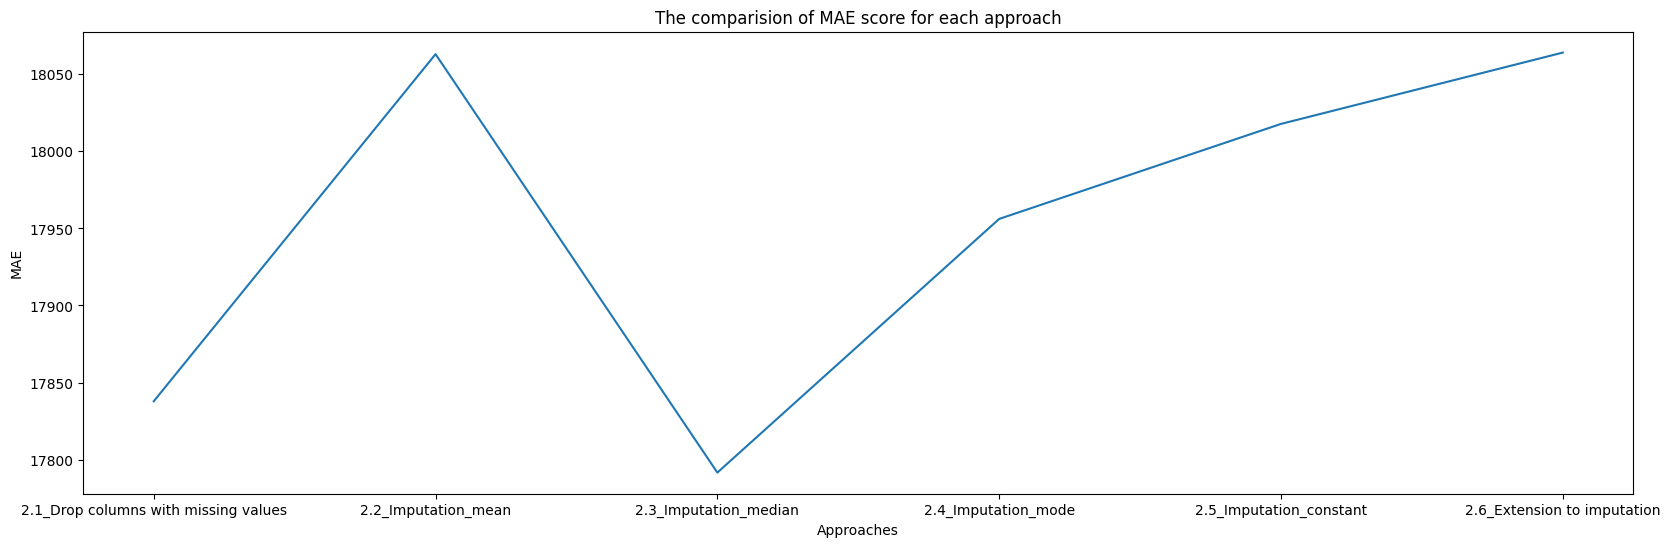

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

X = [x for x in scores_dict.keys()]
Y = [y for y in scores_dict.values()]

fig = plt.figure(figsize=[20, 6])

plt.plot(X,Y)

plt.xlabel('Approaches')
plt.ylabel('MAE')
plt.title('The comparision of MAE score for each approach')

# Lesson 3 - Categorical Variables

You will get an error if you try to plug the categorical variables into most machine learning models in Python without preprocessing them first. In this tutorial, we'll compare three approaches that you can use to prepare your categorical data.

**Three Approaches**

* **1) Drop Categorical Variables**

The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.

* **2) Ordinal Encoding**

Ordinal encoding assigns each unique value to a different integer.
Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables.

* **3) One-Hot Encoding**

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. 

one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as nominal variables.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).



# 3.1 - Drop Categorical Variables

You'll get started with the most straightforward approach. 

Remove columns with categorical data. 


In [41]:
# Read the data
X = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [42]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


Notice that the dataset contains both numerical and categorical variables. You'll need to encode the categorical data before training a model.

In [43]:
# Drop columns with categorical data

drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [44]:
print("MAE (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE (Drop categorical variables):
17837.82570776256


In [45]:
# Store the score in the dictionary

scores_dict['3.1_Drop categorical variables'] = score_dataset(drop_X_train, drop_X_valid, y_train, y_valid)

print(scores_dict['3.1_Drop categorical variables'])

17837.82570776256


# 3.2 - Ordinal encoding

Before jumping into ordinal encoding, we'll investigate the dataset. Specifically, we'll look at the 'Condition2' column. 

In [46]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


If you now write code to:

* fit an ordinal encoder to the training data, and then
* use it to transform both the training and validation data,

you'll get an error. 

Can you see why this is the case? 

(You'll need to use the above output to answer this question.)

Hint: Are there any values that appear in the validation data but not in the training data?

Answer: Fitting an ordinal encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the 'Condition2' column in the validation data contains the values 'RRAn' and 'RRNn', but these don't appear in the training data -- thus, if we try to use an ordinal encoder with scikit-learn, the code will throw an error.

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue. 

For instance, you can write a custom ordinal encoder to deal with new categories. 

The simplest approach, is to drop the problematic categorical columns.

In [47]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Condition2', 'Functional', 'RoofMatl']


In [48]:
# Drop categorical columns that will not be encoded (bad_label_cols)

label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

In [49]:
# Apply ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])


In [50]:
print("MAE (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE (Ordinal Encoding):
17098.01649543379


In [51]:
# Store the score in the dictionary

scores_dict['3.2_Ordinal Encoding'] = score_dataset(label_X_train, label_X_valid, y_train, y_valid)

print(scores_dict['3.2_Ordinal Encoding'])

17098.01649543379


You've seen that encoding categorical data yields better results than removing columns from the dataset.

# 3.3 - One-hot encoding

Soon, you'll try one-hot encoding. 
Before then, there's one additional topic we need to cover.

**"Investigating cardinality"**

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable. 

For instance, the 'Street' variable has cardinality 2.


In [52]:
# Get number of unique entries in each column with categorical data

object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order

sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

Q: How many categorical variables in the training data have cardinality greater than 10?

A: high_cardinality_numcols = 3

Q: How many columns are needed to one-hot encode the 'Neighborhood' variable in the training data?

A: num_cols_neighborhood = 25


For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset. 

For this reason, we typically will only one-hot encode columns with relatively low cardinality. 

Then, high cardinality columns can either be dropped from the dataset, or we can use ordinal encoding.


In [53]:
# Columns that will be one-hot encoded

low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset

high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior2nd', 'Exterior1st', 'Neighborhood']


We use the OneHotEncoder class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

We set **handle_unknown='ignore'** to avoid errors when the validation data contains classes that aren't represented in the training data, and

setting **sparse=False** ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. 

The full list of categorical columns in the dataset can be found in the Python list **object_cols**.

You should only one-hot encode the categorical columns in **low_cardinality_cols**. 

All other categorical columns should be dropped from the dataset.

In [54]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [55]:
print("MAE (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE (One-Hot Encoding):
17525.345719178084


In [56]:
# Store the score in the dictionary

scores_dict['3.3_One-Hot Encoding'] = score_dataset(OH_X_train, OH_X_valid, y_train, y_valid)

print(scores_dict['3.3_One-Hot Encoding'])

17525.345719178084


# Lesson 4 - Pipelines 

Pipelines are a simple way to keep your data preprocessing and modeling code organized. 

Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

**1. Cleaner Code**: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.

**2. Fewer Bugs:** There are fewer opportunities to misapply a step or forget a preprocessing step.

**3. Easier to Productionize:** It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.

**4. More Options for Model Validation:** You will see an example in the next tutorial, which covers cross-validation.

In [57]:
# Read the data
X_full = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [58]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [59]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


We construct the full pipeline in three steps.

Step 1: Define Preprocessing Steps

Step 2: Define the Model

Step 3: Create and Evaluate the Pipeline

**Step 1: Define Preprocessing Steps**

Similar to how a pipeline bundles together preprocessing and modeling steps, 

we use the **ColumnTransformer** class to bundle together different preprocessing steps. The code below:

* imputes missing values in numerical data, and
* imputes missing values and applies a one-hot encoding to categorical data.

In [60]:
# Step 1: Define Preprocessing Steps

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Step 2: Define the Model**

Next, we define a random forest model with the familiar RandomForestRegressor class.

In [61]:
# Step 2: Define the Model

model = RandomForestRegressor(n_estimators=100, random_state=0)


**Step 3: Create and Evaluate the Pipeline**

Finally, we use the Pipeline class to define a pipeline that bundles the preprocessing and modeling steps. There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a single line of code. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)

* With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

In [62]:
# Step 3: Create and Evaluate the Pipeline

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17614.81993150685


In [63]:
# Store the score in the dictionary
scores_dict['4.1_Pipeline_con_mode'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.1_Pipeline_con_mode'])

17614.81993150685


**Improve the performance**

Now, define your own preprocessing steps and random forest model. 

Fill in values for the following variables:

* numerical_transformer
* categorical_transformer
* model

In [64]:
# Improve the performance
# Try to change categorical_transformer (strategy='constant')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [65]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17540.473424657535


In [66]:
# Store the score in the dictionary

scores_dict['4.2_Pipeline_con_con'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.2_Pipeline_con_con'])

17540.473424657535


In [67]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17495.59904109589


In [68]:
# Store the score in the dictionary

scores_dict['4.3_Pipeline_med_con'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.3_Pipeline_med_con'])

17495.59904109589


In [69]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17569.563630136985


In [70]:
# Store the score in the dictionary

scores_dict['4.4_Pipeline_mode_con'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.4_Pipeline_mode_con'])

17569.563630136985


In [71]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17635.4676369863


In [72]:
# Store the score in the dictionary

scores_dict['4.5_Pipeline_mean_con'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.5_Pipeline_mean_con'])

17635.4676369863


In [73]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='median')
# and categorical_transformer (strategy='most_frequent')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17514.986232876712


In [74]:
# Store the score in the dictionary

scores_dict['4.6_Pipeline_med_mode'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.6_Pipeline_med_mode'])

17514.986232876712


In [75]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='mean')
# and categorical_transformer (strategy='most_frequent')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17612.84342465753


In [76]:
# Store the score in the dictionary

scores_dict['4.7_Pipeline_mean_mode'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.7_Pipeline_mean_mode'])

17612.84342465753


In [77]:
# Improve the performance
# Try to change numerical_transformer = SimpleImputer(strategy='most_frequent')
# and categorical_transformer (strategy='most_frequent')

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17699.126369863014


In [78]:
# Store the score in the dictionary

scores_dict['4.8_Pipeline_mode_mode'] = mean_absolute_error(y_valid, preds)
print(scores_dict['4.8_Pipeline_mode_mode'])

17699.126369863014


In [79]:
# Generate test predictions
# Preprocessing of test data, fit model

preds_test = my_pipeline.predict(X_test)


In [80]:
# Save test predictions to file

output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Lesson 5 - Cross-Validation

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.


When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.

* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [81]:
# Read the data
train_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if 
                train_data[cname].dtype in ['int64', 'float64']]

X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [82]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


So far, you've learned how to build pipelines with scikit-learn. For instance, the pipeline below will use SimpleImputer() to replace missing values in the data, before using RandomForestRegressor() to train a random forest model to make predictions. We set the number of trees in the random forest model with the n_estimators parameter, and setting random_state ensures reproducibility.

In [83]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))])

You have also learned how to use pipelines in cross-validation. The code below uses the cross_val_score() function to obtain the mean absolute error (MAE), averaged across five different folds. Recall we set the number of folds with the cv parameter.

In [84]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE

scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


**Step 1: Write a useful function**

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function **get_score()** that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:

* the data in X and y to create folds,
* SimpleImputer() (with all parameters left as default) to replace missing values, and
* RandomForestRegressor() (with random_state=0) to fit a random forest model.

The **n_estimators** parameter supplied to **get_score()** is used when setting the number of trees in the random forest model.

In [85]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()


**Step 2: Test different parameter values**

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary results, where results[i] is the average MAE returned by get_score(i).

In [86]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

In [87]:
results

{50: 18353.8393511688,
 100: 18395.2151680032,
 150: 18288.730020956387,
 200: 18248.345889801505,
 250: 18255.26922247291,
 300: 18275.241922621914,
 350: 18270.29183308043,
 400: 18270.197974402367}

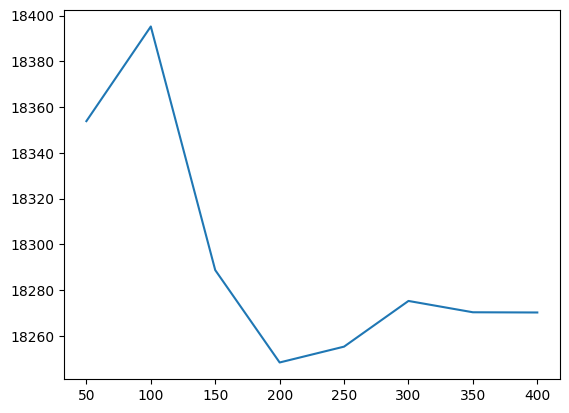

In [88]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [89]:
# Step 3: Find the best parameter value

n_estimators_best = min(results, key=results.get)
n_estimators_best

200

# Lesson 6 - XGBoost 

**Introduction**

For much of this course, you have made predictions with the random forest method, which achieves better performance than a single decision tree simply by averaging the predictions of many decision trees.

We refer to the random forest method as an **"ensemble method"**. By definition, ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).

Next, we'll learn about another ensemble method called **gradient boosting**.

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

* First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
* These predictions are used to calculate a loss function (like mean squared error, for instance).
* Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
* Finally, we add the new model to ensemble, and ...
* ... repeat!

In [90]:
# Read the data
X = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if 
                        X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [91]:
# Step 1: Build model

from xgboost import XGBRegressor

my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [92]:
# Predict

predictions_1 = my_model_1.predict(X_valid)

In [93]:
# Calculate MAE

mae_1 = mean_absolute_error(predictions_1, y_valid)

print(mae_1)

18161.82412510702


In [94]:
# Store the score in the dictionary

scores_dict['6.1_XGB'] = mean_absolute_error(predictions_1, y_valid)
print(scores_dict['6.1_XGB'])

18161.82412510702


In [95]:
# Step 2: Improve the model

# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 17224.27947078339


In [97]:
# Store the score in the dictionary

scores_dict['6.2_XGB_n1000_lr0.05'] = mean_absolute_error(predictions_2, y_valid)
print(scores_dict['6.2_XGB_n1000_lr0.05'])

17224.27947078339


**Parameter Tuning**

XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

> **n_estimators**

n_estimators specifies how many times to go through the modeling cycle described above. 

It is equal to the number of models that we include in the ensemble.

* Too *low* a value causes *underfitting*, which leads to inaccurate predictions on both training data and test data.
* Too *high* a value causes *overfitting*, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the learning_rate parameter discussed below.

In [98]:
# Step 3: Break the model

# Define the model
my_model_3 = XGBRegressor(n_estimators=100)

# Fit the model
my_model_3.fit(X_train, y_train)

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)
print("Mean Absolute Error:" , mae_3)


Mean Absolute Error: 18161.82412510702


In [99]:
# Store the score in the dictionary

scores_dict['6.3_XGB_n100'] = mean_absolute_error(predictions_3, y_valid)
print(scores_dict['6.3_XGB_n100'])

18161.82412510702


> **early_stopping_rounds**

early_stopping_rounds offers a way to automatically find the ideal value for n_estimators. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. 

It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. Setting early_stopping_rounds=5 is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using early_stopping_rounds, you also need to set aside some data for calculating the validation scores - this is done by setting the **eval_set** parameter.

In [100]:
# Gradient boosting - Early stopping rounds

# Define the model
my_model_4 = XGBRegressor(n_estimators=1000)

# Fit the model
my_model_4.fit(X_train, y_train,
               early_stopping_rounds=5,
               eval_set=[(X_valid, y_valid)],
               verbose=False)
               

# Get predictions
predictions_4 = my_model_4.predict(X_valid)

# Calculate MAE
mae_4 = mean_absolute_error(predictions_4, y_valid)
print("Mean Absolute Error:" , mae_4)

scores_dict['6.4_XGB_n1000_estop5'] = mean_absolute_error(predictions_4, y_valid)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 17875.429205907534


> **learning_rate**

Instead of getting predictions by simply adding up the predictions from each component model, we can multiply the predictions from each model by a small number (known as the learning rate) before adding them in.

This means each tree we add to the ensemble helps us less. So, we can set a higher value for n_estimators without overfitting. If we use early stopping, the appropriate number of trees will be determined automatically.

In general, a small learning rate and large number of estimators will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets learning_rate=0.1.

In [101]:
# Gradient boosting - Early stopping rounds

# Define the model
my_model_5 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_5.fit(X_train, y_train,
               early_stopping_rounds=5,
               eval_set=[(X_valid, y_valid)],
               verbose=False)
               

# Get predictions
predictions_5 = my_model_5.predict(X_valid)

# Calculate MAE
mae_5 = mean_absolute_error(predictions_5, y_valid)
print("Mean Absolute Error:" , mae_5)

scores_dict['6.5_XGB_n1000_estop5_lr0.05'] = mean_absolute_error(predictions_5, y_valid)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 17032.769063035103


> **n_jobs**

On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. 

It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.

The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

In [102]:
# Define the model
my_model_6 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

# Fit the model
my_model_6.fit(X_train, y_train,
               early_stopping_rounds=5,
               eval_set=[(X_valid, y_valid)],
               verbose=False)
               

# Get predictions
predictions_6 = my_model_6.predict(X_valid)

# Calculate MAE
mae_6 = mean_absolute_error(predictions_6, y_valid)
print("Mean Absolute Error:" , mae_6)

scores_dict['6.6_XGB_n1000_estop5_lr0.05_njob4'] = mean_absolute_error(predictions_6, y_valid)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 17032.769063035103


In [103]:
# Define the model
my_model_7 = XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=4)

# Fit the model
my_model_7.fit(X_train, y_train,
               early_stopping_rounds=10,
               eval_set=[(X_valid, y_valid)],
               verbose=False)
               

# Get predictions
predictions_7 = my_model_7.predict(X_valid)

# Calculate MAE
mae_7 = mean_absolute_error(predictions_7, y_valid)
print("Mean Absolute Error:" , mae_7)

scores_dict['6.7_XGB_n1000_estop10_lr0.02_njob4'] = mean_absolute_error(predictions_7, y_valid)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 16995.17224957192


# 7. Pipeline with multiple models

In [104]:
# Read the data
X = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if 
                        X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [105]:
# Create Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median') 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [106]:
# Define model
# Model 1 - RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=1000, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model1)
                             ])

# Preprocessing of training data, fit model 
my_pipeline1.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = my_pipeline1.predict(X_valid)

# Evaluate the model
scores_dict['7.1_RF'] = mean_absolute_error(y_valid, preds1)
print('MAE:', scores_dict['7.1_RF'])

MAE: 17248.08091438356


In [107]:
# Define model
# Model 2 - XGBRegressor

model2 = XGBRegressor(n_estimators=1000, learning_rate=0.02)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model2)
                             ])

# Preprocessing of training data, fit model 
my_pipeline2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = my_pipeline2.predict(X_valid)

# Evaluate the model
scores_dict['7.2_XGB'] = mean_absolute_error(y_valid, preds2)
print('MAE:', scores_dict['7.2_XGB'])

MAE: 16634.44945954623


In [108]:
# Define model
# Model 3 - GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline3 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model3)
                             ])

# Preprocessing of training data, fit model 
my_pipeline3.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds3 = my_pipeline3.predict(X_valid)

# Evaluate the model
scores_dict['7.3_GBR'] = mean_absolute_error(y_valid, preds3)
print('MAE:', scores_dict['7.3_GBR'])

MAE: 15811.477332794464


In [109]:
# Define model
# Model 4 - CatBoostRegressor

from catboost import CatBoostRegressor

model4 = CatBoostRegressor(loss_function='RMSE',verbose=False, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline4 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model4)
                             ])

# Preprocessing of training data, fit model 
my_pipeline4.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds4 = my_pipeline4.predict(X_valid)

# Evaluate the model
scores_dict['7.4_CBR'] = mean_absolute_error(y_valid, preds4)
print('MAE:', scores_dict['7.4_CBR'])

MAE: 16053.765998589735


# Conclusion 

In [110]:
print(scores_dict)

{'2.1_Drop columns with missing values': 17837.82570776256, '2.2_Imputation_mean': 18062.894611872147, '2.3_Imputation_median': 17791.59899543379, '2.4_Imputation_mode': 17956.065479452056, '2.5_Imputation_constant': 18017.665970319635, '2.6_Extension to imputation': 18063.910194063923, '3.1_Drop categorical variables': 17837.82570776256, '3.2_Ordinal Encoding': 17098.01649543379, '3.3_One-Hot Encoding': 17525.345719178084, '4.1_Pipeline_con_mode': 17614.81993150685, '4.2_Pipeline_con_con': 17540.473424657535, '4.3_Pipeline_med_con': 17495.59904109589, '4.4_Pipeline_mode_con': 17569.563630136985, '4.5_Pipeline_mean_con': 17635.4676369863, '4.6_Pipeline_med_mode': 17514.986232876712, '4.7_Pipeline_mean_mode': 17612.84342465753, '4.8_Pipeline_mode_mode': 17699.126369863014, '6.1_XGB': 18161.82412510702, '6.2_XGB_n1000_lr0.05': 17224.27947078339, '6.3_XGB_n100': 18161.82412510702, '6.4_XGB_n1000_estop5': 17875.429205907534, '6.5_XGB_n1000_estop5_lr0.05': 17032.769063035103, '6.6_XGB_n1000

In [111]:
scores = pd.DataFrame([scores_dict])
scores = scores.melt().reset_index(drop = True)
scores.columns = ["Approches", "MAE"]
scores

,Approches,MAE
0,2.1_Drop columns with missing values,17837.825708
1,2.2_Imputation_mean,18062.894612
2,2.3_Imputation_median,17791.598995
3,2.4_Imputation_mode,17956.065479
4,2.5_Imputation_constant,18017.665970
5,2.6_Extension to imputation,18063.910194
6,3.1_Drop categorical variables,17837.825708
7,3.2_Ordinal Encoding,17098.016495
8,3.3_One-Hot Encoding,17525.345719
9,4.1_Pipeline_con_mode,17614.819932


In [112]:
scores.sort_values(by=['MAE'], ascending=True)

,Approches,MAE
26,7.3_GBR,15811.477333
27,7.4_CBR,16053.765999
25,7.2_XGB,16634.449460
23,6.7_XGB_n1000_estop10_lr0.02_njob4,16995.172250
22,6.6_XGB_n1000_estop5_lr0.05_njob4,17032.769063
21,6.5_XGB_n1000_estop5_lr0.05,17032.769063
7,3.2_Ordinal Encoding,17098.016495
18,6.2_XGB_n1000_lr0.05,17224.279471
24,7.1_RF,17248.080914
11,4.3_Pipeline_med_con,17495.599041


In [113]:
# Generate test predictions

best_model = "model 7.3_GBR"

# 7.3_GBR : my_pipeline3

preds_test = my_pipeline3.predict(X_test)


In [114]:
# Save test predictions in format used for competition scoring

output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

In [115]:
output.head()

,Id,SalePrice
0,1461,118351.783671
1,1462,167923.545802
2,1463,187050.289860
3,1464,189660.506476
4,1465,192308.405838


Finally, I would like to say thank you for Machine learning course from Kaggle Learn. 

As a Beginner, I learned a lot from this course. 👍

For anyone who has not learned this course, I hope this notebook will be useful to you.

If you have any suggestions or any comment, I would appreciate it.

Thank you. 😊

